In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv('data.csv')
df = df.sort_values(by=['Day Date'])

In [41]:
df

,Unnamed: 0,Day Date,Normalized Hourly Base Rate,Job Code - Job Title
48446,9028,2019-01-15,23.28,9546 - Post-Doctoral Associate
43054,3636,2019-01-15,53.57,9403 - Assistant Professor
43053,3635,2019-01-15,46.42,9403 - Assistant Professor
43052,3634,2019-01-15,55.67,9403 - Assistant Professor
43051,3633,2019-01-15,35.27,9403 - Assistant Professor
...,...,...,...,...
7213,7213,2022-01-15,25.65,9521 - Research Assistant
7212,7212,2022-01-15,25.30,9521 - Research Assistant
7211,7211,2022-01-15,25.30,9521 - Research Assistant
7219,7219,2022-01-15,22.78,9521 - Research Assistant


KeyboardInterrupt: 

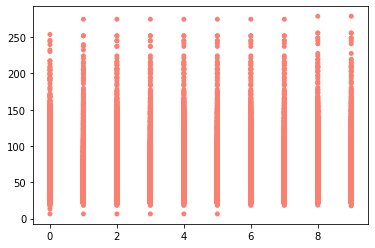

In [45]:
selections = {
    'professors' : (df['Job Code - Job Title'].str.contains('Professor'), 'salmon'),
    'graduate students' : (df['Job Code - Job Title'].str.contains('^95'), 'steelblue'),
    'president' : (df['Job Code - Job Title'] == '9301 - President', 'black')
}
for label, (sl, color) in selections.items() :
    ax = sns.swarmplot(x="Day Date", y="Normalized Hourly Base Rate",
                       data=df[sl], color='salmon',label=label)
    ax = sns.boxplot(x="Day Date", y="Normalized Hourly Base Rate", data=df[sl],
                    showcaps=False,boxprops={'facecolor':'None'},
                    showfliers=False,whiskerprops={'linewidth':0},
                    color='salmon',label=label)
plt.legend()
plt.show()

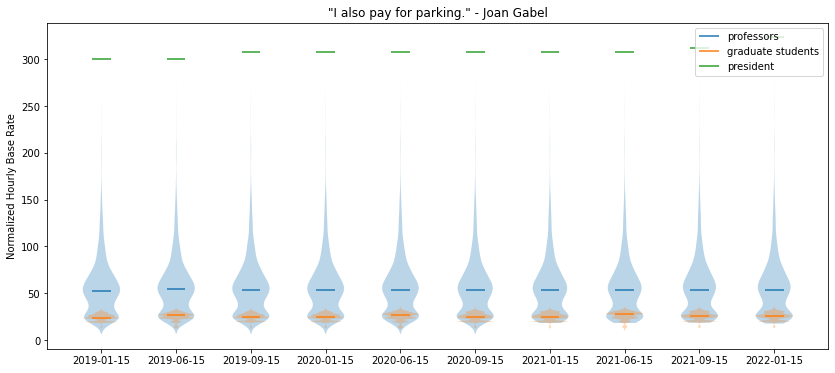

In [75]:
selections = {
    'professors' : (df['Job Code - Job Title'].str.contains('Professor'), 'salmon'),
    'graduate students' : (df['Job Code - Job Title'].str.contains('^95'), 'steelblue'),
    'president' : (df['Job Code - Job Title'] == '9301 - President', 'black')
}
plt.figure(figsize=(14,6))
for label, (sl, color) in selections.items() :
    d = plt.violinplot(
        [df[(sl)&(df['Day Date']==d)]['Normalized Hourly Base Rate'] for d in df['Day Date'].unique()],
        showextrema=False, showmedians=True)
    d['cmedians'].set_label(label)
ax = plt.gca()
ax.set_xticks([1,2,3,4,5,6,7,8,9,10])
ax.set_xticklabels(df['Day Date'].unique())
plt.ylabel('Normalized Hourly Base Rate')
#plt.yscale('log')
plt.legend()
plt.title('"I also pay for parking." - Joan Gabel')
plt.show()